#                                          House Prices 

In [34]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import pandas as pd
import statistics
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
import patsy
import numpy as np
from sklearn.linear_model import LinearRegression

In [35]:
df = pd.read_csv('https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/bdfc59ed-c3c7-48ac-a3d3-9e54663f6c1d.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Analyse exploratoire 

In [36]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [37]:
# plt.figure(figsize=(30,30))
# cor = df.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

In [38]:
# profile = ProfileReport(df, title="Pandas Profiling Report Train from House Prices")
# profile

# Selection des colonnes pour notre modèle

In [39]:
df_new = df[['1stFlrSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea','OverallQual','SalePrice']].rename(columns={'1stFlrSF': 'FirstFloor'})
df_new

,FirstFloor,TotalBsmtSF,GrLivArea,GarageArea,OverallQual,SalePrice
0,856,856,1710,548,7,208500
1,1262,1262,1262,460,6,181500
2,920,920,1786,608,7,223500
3,961,756,1717,642,7,140000
4,1145,1145,2198,836,8,250000
...,...,...,...,...,...,...
1455,953,953,1647,460,6,175000
1456,2073,1542,2073,500,6,210000
1457,1188,1152,2340,252,7,266500
1458,1078,1078,1078,240,5,142125


# Descriptions des colonnes séléctionnées pour la régression

FirstFloor = Superfie du Premier étage

TotalBsmtSF = Superficie du sous-sol

GrLivArea = Superficie des étages

GarageArea = Superficie du garage

OverallQual = Qualité globale des matériaux et des finitions (De 1 a 10)


## Visualisation des différentes régréssions linéaires en fonctions de nos paramètres

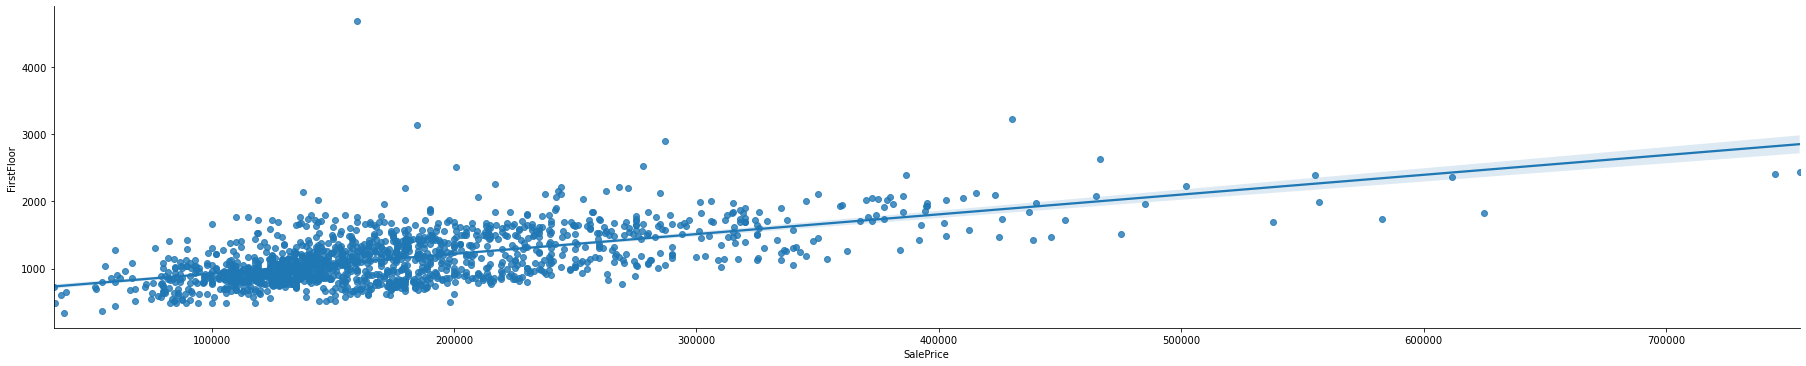

In [40]:
sns.lmplot(data=df_new, x='SalePrice', y='FirstFloor', height=5, aspect=5)

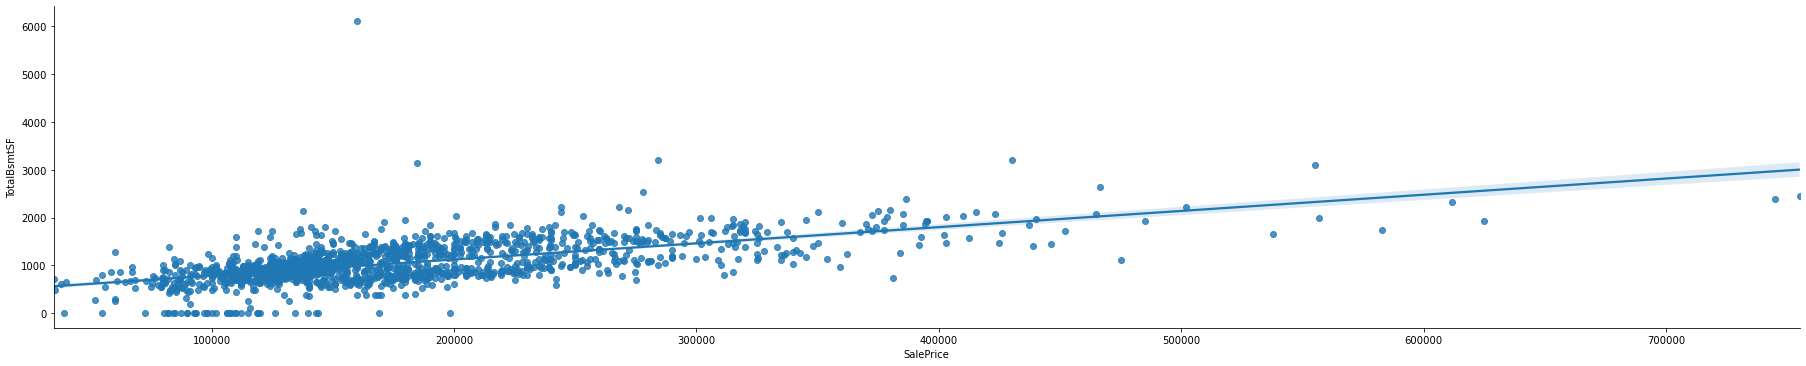

In [41]:
sns.lmplot(data=df_new, x='SalePrice', y='TotalBsmtSF', height=5, aspect=5)

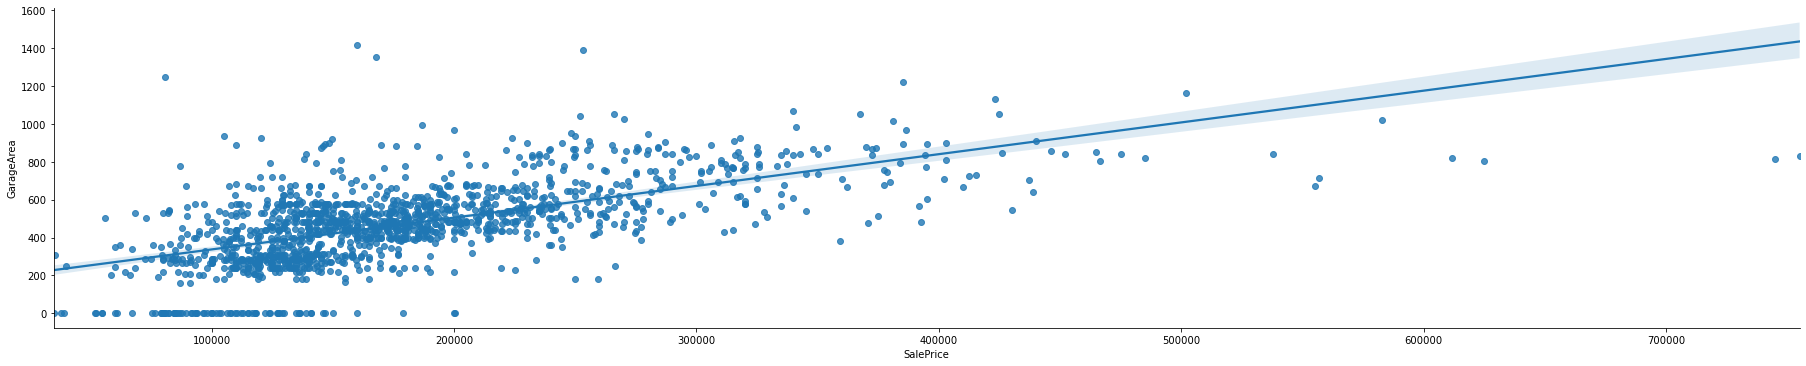

In [42]:
sns.lmplot(data=df_new, x='SalePrice', y='GarageArea', height=5, aspect=5)

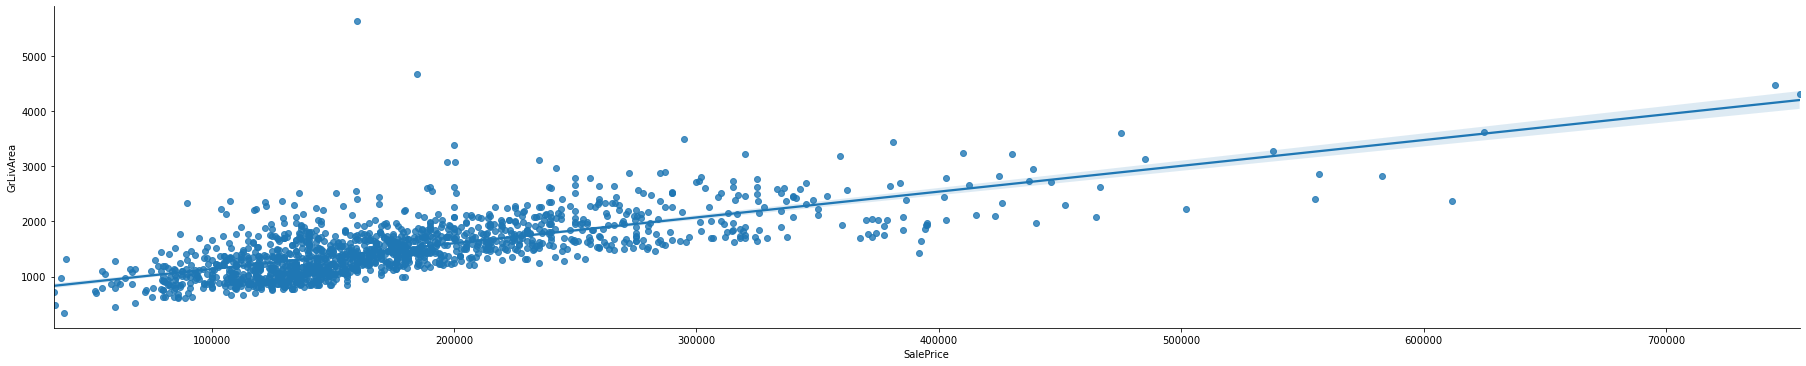

In [43]:
sns.lmplot(data=df_new, x='SalePrice', y='GrLivArea', height=5, aspect=5)

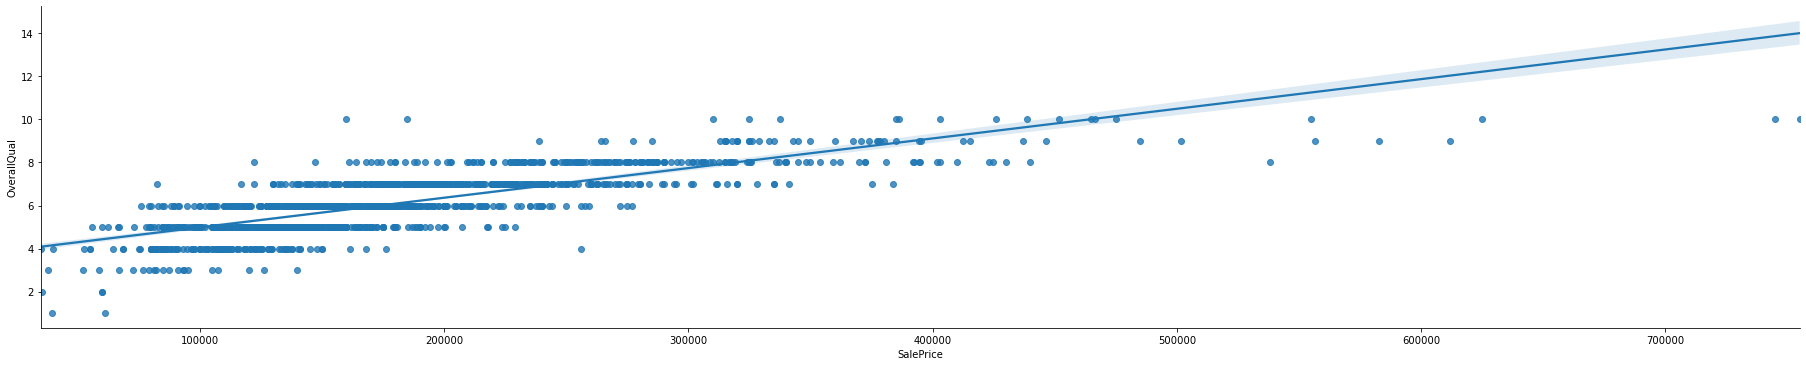

In [44]:
sns.lmplot(data=df_new, x='SalePrice', y='OverallQual', height=5, aspect=5)

# Regression Linéaires avec Statsmodels

In [112]:
X = df_new["OverallQual"]
X = np.vander(X, 2) 
y = df_new["SalePrice"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Thu, 20 May 2021   Prob (F-statistic):          2.19e-313
Time:                        15:57:42   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.544e+04    920.430     49.364      0.0

In [126]:
mod = smf.ols(formula='SalePrice ~ OverallQual', data=df_new).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Thu, 20 May 2021   Prob (F-statistic):          2.19e-313
Time:                        17:06:55   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.621e+04   5756.407    -16.713      0.000   -1.07e+05   -8.49e+04
OverallQual  4.544e+04    920.430     49.364      0.000    4.36e+04    4.72e+04
==============================================================================
Omnibus:                      591.594   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5872.098
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
print(mod.params['Intercept'])
print(mod.params['OverallQual'])

-96206.0795147603
45435.80259309938


# Regression Linéaires avec SkLearn

In [113]:
X = np.array(df_new[["OverallQual",]])
y = np.array(df_new["SalePrice"])

reg = LinearRegression().fit(X, y)
print(f"R squarred :{reg.score(X, y)}")
print(f"\n FirstFloor coef : {reg.coef_[0]}\n intercept : {reg.intercept_}")

R squarred :0.625651892462118

 FirstFloor coef : 45435.8025930994
 intercept : -96206.07951476038


In [114]:
X = np.array(df_new[["OverallQual","FirstFloor"]])
y = np.array(df_new["SalePrice"])

reg = LinearRegression().fit(X, y)
print(f"R squarred :{reg.score(X, y)}")
print(f"\n OverallQual coef : {reg.coef_[0]}\n FirstFloor coef : {reg.coef_[1]}\n intercept : {reg.intercept_}")


R squarred :0.6935737594937618

 OverallQual coef : 37328.08189949742
 FirstFloor coef : 60.90608403354309
 intercept : -117565.57675787792


In [117]:
X = np.array(df_new[["OverallQual","FirstFloor","TotalBsmtSF"]])
y = np.array(df_new["SalePrice"])

reg = LinearRegression().fit(X, y)
print(f"R squarred :{reg.score(X, y)}")
print(f"\n OverallQual coef : {reg.coef_[0]}\n FirstFloor coef : {reg.coef_[1]}\n TotalBsmtSF coef : {reg.coef_[2]}\n intercept : {reg.intercept_}")

R squarred :0.6950703587115769

 OverallQual coef : 36554.25806162418
 FirstFloor coef : 50.333893045608875
 TotalBsmtSF coef : 12.785315356167638
 intercept : -114073.83872418475


In [123]:
X = np.array(df_new[["OverallQual","FirstFloor","TotalBsmtSF","GrLivArea"]])
y = np.array(df_new["SalePrice"])

reg = LinearRegression().fit(X, y)
print(f"R squarred :{reg.score(X, y)}")
print(f"\n OverallQual coef : {reg.coef_[0]}\n FirstFloor coef : {reg.coef_[1]}\n TotalBsmtSF coef : {reg.coef_[2]}\n GrLivArea coef : {reg.coef_[3]}\n intercept : {reg.intercept_}")

R squarred :0.7438905980432693

 OverallQual coef : 28459.701981454335
 FirstFloor coef : 16.67657900335176
 TotalBsmtSF coef : 25.760367581623257
 GrLivArea coef : 45.98578877058814
 intercept : -108981.69438072134


In [124]:
X = np.array(df_new[["OverallQual","FirstFloor","TotalBsmtSF","GrLivArea", "GarageArea"]])
y = np.array(df_new["SalePrice"])

reg = LinearRegression().fit(X, y)
print(f"R squarred :{reg.score(X, y)}")
print(f"\n OverallQual coef : {reg.coef_[0]}\n FirstFloor coef : {reg.coef_[1]}\n TotalBsmtSF coef : {reg.coef_[2]}\n GrLivArea coef : {reg.coef_[3]}\n GarageArea coef : {reg.coef_[4]}\n intercept : {reg.intercept_}")

R squarred :0.758129257365253

 OverallQual coef : 25317.474906840245
 FirstFloor coef : 11.29093204124096
 TotalBsmtSF coef : 22.951801236686862
 GrLivArea coef : 43.383312260036455
 GarageArea coef : 56.67984178025341
 intercept : -103449.38429469996


# Prédiction avec SKLearn 

In [100]:
def house_prediction_price(FirstFloor,OverallQual,TotalBsmtSF,GrLivArea,GarageArea):
    X = np.array(df_new[["FirstFloor","OverallQual","TotalBsmtSF","GrLivArea", "GarageArea"]])
    y = np.array(df_new["SalePrice"])
    reg = LinearRegression().fit(X, y)
    
    result = round(FirstFloor * reg.coef_[0] + OverallQual * reg.coef_[1] + TotalBsmtSF * reg.coef_[2] + GrLivArea * reg.coef_[3] + GarageArea * reg.coef_[4] + reg.intercept_,2)
    
    result_min = round(reg.score(X, y) * result ,2)
    result_max = round(((1 - reg.score(X, y)) * result + result),2)
    return f"R squarred :{round(reg.score(X, y),4)}, Avec ces paramètres votre maison tendra vers {result}, elle coutera entre {result_min} et {result_max}$"


    
house_prediction_price(FirstFloor=1256,OverallQual=5,TotalBsmtSF=1256,GrLivArea=1256,GarageArea=276)


'R squarred :0.7581, Avec ces paramêtres votre maison tendra vers 136279.94, elle coutera entre 103317.81 et 169242.07$'

In [128]:
df_new_2 = df[['1stFlrSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea','OverallQual','SalePrice','Street']].rename(columns={'1stFlrSF': 'FirstFloor'})
df_new_2

,FirstFloor,TotalBsmtSF,GrLivArea,GarageArea,OverallQual,SalePrice,Street
0,856,856,1710,548,7,208500,Pave
1,1262,1262,1262,460,6,181500,Pave
2,920,920,1786,608,7,223500,Pave
3,961,756,1717,642,7,140000,Pave
4,1145,1145,2198,836,8,250000,Pave
...,...,...,...,...,...,...,...
1455,953,953,1647,460,6,175000,Pave
1456,2073,1542,2073,500,6,210000,Pave
1457,1188,1152,2340,252,7,266500,Pave
1458,1078,1078,1078,240,5,142125,Pave


In [131]:
mod = smf.ols(formula='SalePrice ~ OverallQual + Street - 1', data=df_new_2).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1218.
Date:                Thu, 20 May 2021   Prob (F-statistic):          1.28e-311
Time:                        17:13:32   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1457   BIC:                         3.568e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Street[Grvl] -8.951e+04   2.04e+04     -4.398      0.000   -1.29e+05   -4.96e+04
Street[Pave] -9.635e+04   5772.929    -16.690      0.000   -1.08e+05    -8.5e+04
OverallQual   4.545e+04    922.306     49.283      0.000    4.36e+04    4.73e+04
==============================================================================
Omnibus:                      590.926   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5867.041
Skew:                           1.605   Prob(JB):                         0.00
Kurtosis:                      12.282   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""